In [1]:
import optuna
import numpy as np
from qiskit.circuit.library.standard_gates import RZGate, RXGate, RYGate
from qiskit.visualization import array_to_latex
from stable_baselines3 import PPO
from envs.PPO_env_fixed_target import PPOEnvFixedTarget
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.quantum_info import random_unitary, average_gate_fidelity

c:\Users\Paul\anaconda3\envs\RL_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def circuit_to_unitary(circuit):
    op = Operator(circuit)
    return op.to_matrix()

In [4]:
# U = random_unitary(2**num_qubits).to_matrix()
# print(average_gate_fidelity(Operator(U), Operator(np.eye(2**num_qubits))))
#print(U)

In [2]:
# Add the gates to a list
gates = [RXGate(np.pi/128), RXGate(-np.pi/128),
         RYGate(np.pi/128), RYGate(-np.pi/128),
         RZGate(np.pi/128), RZGate(-np.pi/128)]

# define number of qubits of the quantumm circuit
num_qubits = 1

# set the target unitary U
U = [[0.76749896-0.43959894j, -0.09607122+0.45658344j],[0.09607122+0.45658344j, 0.76749896+0.43959894j]]
# U = [[-0.59492694-0.547864j, 0.52822333+0.25862538j],
#      [-0.36466383-0.46144042j, -0.66146857-0.46535186j]]

env = PPOEnvFixedTarget(U, gates, num_qubits, tolerance=1e-3, max_steps=130)

# load the trained model
model = PPO.load(r'.\trained_models\Rotation_Gates_fixed_target\PPO_Rotation_Gates_fixed_target\best_model.zip', env=env)
#model = PPO('MlpPolicy', env, verbose=1)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\Paul\anaconda3\envs\RL_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(
c:\Users\Paul\anaconda3\envs\RL_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [30]:
#array_to_latex(U, prefix="\\text{U} = ")
array_to_latex(U, prefix="U = ")

<IPython.core.display.Latex object>

In [3]:
# let the agent create a circuit to approximate the target unitary
obs = env.reset()
for i in range(128):
    action, _ = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(int(action))
    clear_output(wait=True)
    env.render(mode='human')
    time.sleep(0.5)
    if info['AGF'] >= 0.999:
        print(f'\nAGF 0.999 reached after {i+1} steps')
        break

   ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
q: ┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├»
   └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«   ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«q: ┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├»
«   └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«   ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌────────────┐»
«q: ┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rz(π/128) ├┤ Rx(-π/128) ├»
«   └───────────┘└───────────┘└───────────┘└───────────┘└────────────┘»
«   ┌───────────┐┌────────────┐┌───────────┐
«q: ┤ Rz(π/128) ├┤ Rx(-π/128) ├┤ Rz(π/128) ├
«   └───────────┘└────────────┘└───────────┘
 average gate fidelity: 0.8146580479197917

KeyboardInterrupt: 

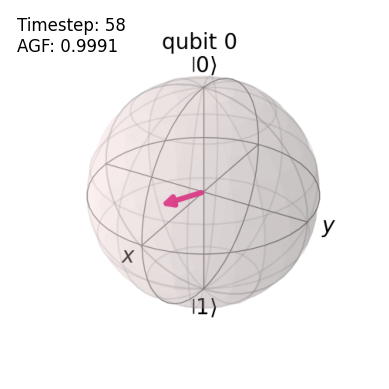

AGF 0.999 reached after 58 steps


In [122]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# Create a matplotlib figure and axis for displaying the Bloch sphere
fig, ax = plt.subplots()
ax.axis('off')

# Display the initial figure
obs = env.reset()
bloch_image = env.render(mode='rgb_array') # the rgb_array mode returns an array that is a picture 
image = ax.imshow(bloch_image)
text = ax.text(0.02, 0.98, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)
text.set_text(f'Timestep: {0}')
plt.pause(0.01)

# Run the agent for 100 steps
for i in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(int(action))
    bloch_image = env.render(mode='rgb_array')

    # Update the image data, timestep, and display the figure
    image.set_data(bloch_image)
    text.set_text(f'Timestep: {i+1} \nAGF: {info["AGF"]:.4f}')
    clear_output(wait=True)
    display(fig)
    plt.pause(0.01)
    if info['AGF'] >= 0.999:
        print(f'AGF 0.999 reached after {i+1} steps')
        break
        


AGF 0.999 reached after 76 steps
[-0.002065256121884481, -0.0020237369363880695, -0.0019828794859305726, -0.0019427083815123855, -0.001903247820704718, -0.001864521573073874, -0.0018265529658633586, -0.001789364869942419, -0.0017529796860294834, -0.0017174193311988097, -0.0016827052256784662, -0.001648858279947572, -0.001615898882140612, -0.0015838468857664028, -0.001535426171473282, -0.0015041170922817427, -0.0014562301957466814, -0.0014257073236939102, -0.0013784063571658331, -0.0013319416332277102, -0.0013020917641123624, -0.0012562922168130085, -0.0012273358710336874, -0.001182251313484225, -0.0011542287314580692, -0.00110990811546829, -0.0010665586039822544, -0.0010393882524467968, -0.0009968766617746757, -0.0009707388707762418, -0.0009291113172447121, -0.000888547323512289, -0.0008633819559212915, -0.0008237713093375382, -0.000799730600161314, -0.0007611162192633589, -0.0007382339265842231, -0.0007006575297731674, -0.0006642601133934957, -0.0006425002827413583, -0.000607203053603

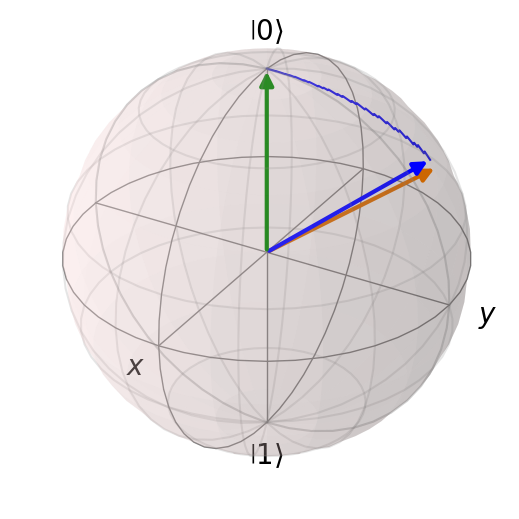

In [8]:
import matplotlib.pyplot as plt
from qutip import Bloch
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit.visualization.state_visualization import _bloch_multivector_data
# Create an empty Bloch sphere
b = Bloch()
statevectors = []


# Define the target state
qc = QuantumCircuit(1)
qc.append(Operator(U), [0])
target_state = _bloch_multivector_data(Statevector.from_instruction(qc))

# Display the initial figure
obs = env.reset()
statevectors.append(env.render(mode='statevector')[0])

rewards = []
# Run the agent for 100 steps
for i in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(int(action))
    rewards.append(reward)
    statevectors.append(env.render(mode='statevector')[0])
    if info['AGF'] >= 0.999:
        print(f'AGF 0.999 reached after {i+1} steps')
        break
print(rewards)

x,y,z = zip(*statevectors)
b.add_points([x,y,z], meth='l',)
b.add_vectors([x[0],y[0],z[0]])
b.add_vectors(target_state)
b.add_vectors([x[-1],y[-1],z[-1]])



b.show()
b.save('trajectory_on_bloch_sphere.png', dpin=300)
#env.qc.draw('mpl')
#array_to_latex(circuit_to_unitary(env.qc), prefix="U_{approx} = ")


In [56]:
L = 128
rewards.pop
print(rewards)
# for t in range(L):
#     if t >76:
#         #rewards.append((L - t) + 1)

# print(np.sum(rewards))

-0.06157041903715571


In [58]:
rewards = [-0.06157041903715571]
L=130
for t in range(L):
    if t >76:
        rewards.append((L - t) + 1)

print(np.sum(rewards))

1483.9384295809627
